In [290]:
import pandas as pd
import numpy as np
df = pd.read_pickle('FULL-SYS-RESULTS3.pkl')
#df.sort_values('language', inplace=True, ignore_index=True)
df.rename(columns={'labels': 'label'}, inplace=True)
df

,raw texts,texts,label,language,similarity vals,site predictions,headline real pred,headline fake pred,image real pred,image fake pred
0,"SURE, TRUMPS RALLIES ARE HUGE, BUT YOURE AHEAD...","Sure, Trump's rallies are huge, but you're ahe...",0,en,"[0.37241998, 0.40203744, 0.27151322, 0.3271778...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",9.999995e-01,5.179035e-07,0.529542,0.470458
1,"NEWS GEORGE FLOYD DeATH 'Beautiful, peaceful a...","Cleaned text: News: George Floyd death - ""Beau...",0,en,"[0.25555542, nan, nan, nan, nan, nan, nan, nan...","[1.0, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.615371e-07,9.999999e-01,0.021296,0.978704
2,PELOSI JUSTORDEREDTO REMOVE4 PAINTINGS OFFORME...,Pelosi just ordered to remove four paintings o...,0,en,"[0.73492, 0.77542365, 0.7370255, 0.70402515, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, nan, nan, ...",2.298337e-07,9.999998e-01,0.535050,0.464950
3,"Farming done by Farming done by ""dumb, uneduca...","Farming done by ""dumb, uneducated, intelligent...",0,en,"[0.8407163, nan, nan, nan, nan, nan, nan, nan,...","[0.0, nan, nan, nan, nan, nan, nan, nan, nan, ...",3.791442e-07,9.999996e-01,0.041633,0.958367
4,"Stella Immanuel MD @st. 8h Woah CNN, MSNBC etc...","Stella Immanuel MD Woah CNN, MSNBC etc are doi...",0,en,"[0.53741693, 0.22211695, 0.4818051, 0.2708221,...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, nan, nan, ...",7.693195e-07,9.999993e-01,0.155487,0.844513
...,...,...,...,...,...,...,...,...,...,...
184,FILE PHOTO 300 FAMILIES LOSE HOMES IN PARANAQU...,/MICHAEL VARCAS Around 300 families were left ...,1,en,"[0.63409865, 0.2898523, 0.45303708, 0.09267762...","[1.0, 1.0, 1.0, nan, nan, nan, nan, nan, nan, ...",9.999890e-01,1.092601e-05,0.852636,0.147364
185,Public unites in holding the Met police accoun...,Public unites in holding the Met police accoun...,1,en,"[0.8566148, 0.53624713, 0.6473944, 0.59203964,...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2.784300e-07,9.999998e-01,0.870380,0.129620
186,PHOTO/FACEBOOK 4 In order to ensure absolute f...,PHOTO/FACEBOOK 4 In order to ensure absolute f...,1,en,"[0.13721272, 0.6355908, 0.091528565, 0.4797958...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, nan, nan, ...",1.753214e-04,9.998247e-01,0.795157,0.204843
187,PHILIPPINE STAR REST IN PEACE Andy Rourke THE ...,"""Philippine Star Rest in Peace Andy Rourke, Th...",1,en,"[0.55543095, 0.7128688, 0.75901335, 0.775345, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, nan, nan, nan, ...",9.999995e-01,4.349464e-07,0.897146,0.102854


In [291]:
# real_df = df[df['label'] == 0].iloc[:50]
# fake_df = df[df['label'] == 1].iloc[:50]
# df = pd.concat([real_df, fake_df], ignore_index=True)

In [292]:
def count_vals(x, nans, ones=True):
    unique, counts = np.unique(x, return_counts=True)
    val_dict = {}
    for i, j in zip(unique, counts):
        if np.isnan(i):
            val_dict['nan'] = j
        else:
            val_dict[i] = j

    if ones == True and nans == False and 1.0 in val_dict.keys():
        return val_dict[1.0]
    elif ones == False and  nans == False and 0.0 in val_dict.keys():
        return val_dict[0.0]
    elif nans == True and ones == False and 'nan' in val_dict.keys():
        return val_dict['nan']

    else:
        return 0
    
df['n real predicted'] = df['site predictions'].apply(lambda x: count_vals(x, nans=False))
df['n fake predicted'] = df['site predictions'].apply(lambda x: count_vals(x, ones=False, nans=False))
df['n nan predicted'] = df['site predictions'].apply(lambda x: count_vals(x, ones=False, nans=True))
df['n real predicted'] = df['n real predicted'].values/10
df['n fake predicted'] = df['n fake predicted'].values/10
df['n nan predicted'] = df['n nan predicted'].values/10

In [293]:
df['sim mean'] = df['similarity vals'].apply(lambda x: np.nanmean(x))
df['pred mean'] = df['site predictions'].apply(lambda x: np.nanmean(x))
en_df = df[df['language']=='en']
tl_df = df[df['language']=='tl']
df

,raw texts,texts,label,language,similarity vals,site predictions,headline real pred,headline fake pred,image real pred,image fake pred,n real predicted,n fake predicted,n nan predicted,sim mean,pred mean
0,"SURE, TRUMPS RALLIES ARE HUGE, BUT YOURE AHEAD...","Sure, Trump's rallies are huge, but you're ahe...",0,en,"[0.37241998, 0.40203744, 0.27151322, 0.3271778...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",9.999995e-01,5.179035e-07,0.529542,0.470458,1.0,0.0,0.0,0.356386,1.000000
1,"NEWS GEORGE FLOYD DeATH 'Beautiful, peaceful a...","Cleaned text: News: George Floyd death - ""Beau...",0,en,"[0.25555542, nan, nan, nan, nan, nan, nan, nan...","[1.0, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.615371e-07,9.999999e-01,0.021296,0.978704,0.1,0.0,0.9,0.255555,1.000000
2,PELOSI JUSTORDEREDTO REMOVE4 PAINTINGS OFFORME...,Pelosi just ordered to remove four paintings o...,0,en,"[0.73492, 0.77542365, 0.7370255, 0.70402515, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, nan, nan, ...",2.298337e-07,9.999998e-01,0.535050,0.464950,0.7,0.0,0.3,0.706407,1.000000
3,"Farming done by Farming done by ""dumb, uneduca...","Farming done by ""dumb, uneducated, intelligent...",0,en,"[0.8407163, nan, nan, nan, nan, nan, nan, nan,...","[0.0, nan, nan, nan, nan, nan, nan, nan, nan, ...",3.791442e-07,9.999996e-01,0.041633,0.958367,0.0,0.1,0.9,0.840716,0.000000
4,"Stella Immanuel MD @st. 8h Woah CNN, MSNBC etc...","Stella Immanuel MD Woah CNN, MSNBC etc are doi...",0,en,"[0.53741693, 0.22211695, 0.4818051, 0.2708221,...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, nan, nan, ...",7.693195e-07,9.999993e-01,0.155487,0.844513,0.3,0.4,0.3,0.353693,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,FILE PHOTO 300 FAMILIES LOSE HOMES IN PARANAQU...,/MICHAEL VARCAS Around 300 families were left ...,1,en,"[0.63409865, 0.2898523, 0.45303708, 0.09267762...","[1.0, 1.0, 1.0, nan, nan, nan, nan, nan, nan, ...",9.999890e-01,1.092601e-05,0.852636,0.147364,0.3,0.0,0.7,0.367416,1.000000
185,Public unites in holding the Met police accoun...,Public unites in holding the Met police accoun...,1,en,"[0.8566148, 0.53624713, 0.6473944, 0.59203964,...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2.784300e-07,9.999998e-01,0.870380,0.129620,0.9,0.1,0.0,0.597204,0.900000
186,PHOTO/FACEBOOK 4 In order to ensure absolute f...,PHOTO/FACEBOOK 4 In order to ensure absolute f...,1,en,"[0.13721272, 0.6355908, 0.091528565, 0.4797958...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, nan, nan, ...",1.753214e-04,9.998247e-01,0.795157,0.204843,0.3,0.4,0.3,0.345145,0.428571
187,PHILIPPINE STAR REST IN PEACE Andy Rourke THE ...,"""Philippine Star Rest in Peace Andy Rourke, Th...",1,en,"[0.55543095, 0.7128688, 0.75901335, 0.775345, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, nan, nan, nan, ...",9.999995e-01,4.349464e-07,0.897146,0.102854,0.6,0.0,0.4,0.701685,1.000000


In [294]:
print('correlation between similarity mean and label',df['sim mean'].corr(df['label']))
print('correlation between site prediction mean and label',df['pred mean'].corr(df['label']))
print('correlation between similarity mean and site prediction mean',df['sim mean'].corr(df['pred mean']))
print('correlation between site prediction mean and label',df['pred mean'].corr(df['label']))
print('correlation between real site predictions and label',df['n real predicted'].corr(df['label']))
print('correlation between fake site similarity mean and label',df['n fake predicted'].corr(df['label']))
print('correlation between empty site predictions similarity mean and label',df['n nan predicted'].corr(df['label']))
print('correlation between similarity mean and empty site predictions',df['sim mean'].corr(df['n nan predicted']))

correlation between similarity mean and label 0.26780511843409976
correlation between site prediction mean and label -0.008092436408295453
correlation between similarity mean and site prediction mean 0.019703305335023253
correlation between site prediction mean and label -0.008092436408295453
correlation between real site predictions and label 0.08077716929651722
correlation between fake site similarity mean and label 0.07676021865532737
correlation between empty site predictions similarity mean and label -0.13762486693148338
correlation between similarity mean and empty site predictions -0.220363223783779


In [295]:
print('fake news similarity mean:', df[df['label'] == 0]['sim mean'].mean())
print('real news similarity mean:', df[df['label'] == 1]['sim mean'].mean())
print('\n')
print('fake news similarity std:', df[df['label'] == 0]['sim mean'].std())
print('real news similarity std:', df[df['label'] == 1]['sim mean'].std())
print('\n')
print('fake news similarity skew:', df[df['label'] == 0]['sim mean'].skew())
print('real news similarity skew:', df[df['label'] == 1]['sim mean'].skew())
print('\n')
print('fake site prediction mean:', df[df['label'] == 0]['pred mean'].mean())
print('real site prediction mean:', df[df['label'] == 1]['pred mean'].mean())
print('\n')
print('fake site prediction std:', df[df['label'] == 0]['pred mean'].std())
print('real site prediction std:', df[df['label'] == 1]['pred mean'].std())
print('\n')
print('fake news prediction skew:', df[df['label'] == 0]['pred mean'].skew())
print('real news prediction skew:', df[df['label'] == 1]['pred mean'].skew())

fake news similarity mean: 0.4394271
real news similarity mean: 0.5277023


fake news similarity std: 0.15001135
real news similarity std: 0.16898583


fake news similarity skew: 0.04879375
real news similarity skew: -0.61518836


fake site prediction mean: 0.6884198
real site prediction mean: 0.6844987


fake site prediction std: 0.24225184
real site prediction std: 0.24473844


fake news prediction skew: -0.804769
real news prediction skew: -0.6880441


In [296]:
print('mean of real predictions in fake news', df[df['label'] == 0]['n real predicted'].mean())
print('mean of real predictions in real news', df[df['label'] == 1]['n real predicted'].mean())
print('\n')
print('mean of fake predictions in fake news', df[df['label'] == 0]['n fake predicted'].mean())
print('mean of fake predictions in real news', df[df['label'] == 1]['n fake predicted'].mean())
print('\n')
print('mean of nan predictions in fake news', df[df['label'] == 0]['n nan predicted'].mean())
print('mean of nan predictions in real news', df[df['label'] == 1]['n nan predicted'].mean())
print('\n')
print('mode of real predictions in fake news', df[df['label'] == 0]['n real predicted'].mode())
print('mode of real predictions in real news', df[df['label'] == 1]['n real predicted'].mode())
print('\n')
print('mode of fake predictions in fake news', df[df['label'] == 0]['n fake predicted'].mode())
print('mode of fake predictions in real news', df[df['label'] == 1]['n fake predicted'].mode())
print('\n')
print('mode of nan predictions in fake news', df[df['label'] == 0]['n nan predicted'].mode())
print('mode of nan predictions in real news', df[df['label'] == 1]['n nan predicted'].mode())
print('\n')
print('median of real predictions in fake news', df[df['label'] == 0]['n real predicted'].median())
print('median of real predictions in real news', df[df['label'] == 1]['n real predicted'].median())
print('\n')
print('median of fake predictions in fake news', df[df['label'] == 0]['n fake predicted'].median())
print('median of fake predictions in real news', df[df['label'] == 1]['n fake predicted'].median())
print('\n')
print('median of nan predictions in fake news', df[df['label'] == 0]['n nan predicted'].median())
print('median of nan predictions in real news', df[df['label'] == 1]['n nan predicted'].median())

mean of real predictions in fake news 0.498989898989899
mean of real predictions in real news 0.5421052631578945


mean of fake predictions in fake news 0.2
mean of fake predictions in real news 0.22421052631578947


mean of nan predictions in fake news 0.301010101010101
mean of nan predictions in real news 0.23368421052631583


mode of real predictions in fake news 0    0.3
1    0.4
2    0.6
3    0.7
Name: n real predicted, dtype: float64
mode of real predictions in real news 0    0.4
Name: n real predicted, dtype: float64


mode of fake predictions in fake news 0    0.2
Name: n fake predicted, dtype: float64
mode of fake predictions in real news 0    0.2
Name: n fake predicted, dtype: float64


mode of nan predictions in fake news 0    0.0
Name: n nan predicted, dtype: float64
mode of nan predictions in real news 0    0.0
Name: n nan predicted, dtype: float64


median of real predictions in fake news 0.5
median of real predictions in real news 0.5


median of fake predictions in fake

In [297]:
print('fake news image prediction mean:', df[df['label'] == 0]['image real pred'].mean())
print('real news image prediction mean:', df[df['label'] == 1]['image real pred'].mean())
print('\n')
print('fake news image prediction std:', df[df['label'] == 0]['image real pred'].std())
print('real news image prediction std:', df[df['label'] == 1]['image real pred'].std())
print('\n')
print('fake news image prediction skew:', df[df['label'] == 0]['image real pred'].skew())
print('real news image prediction skew:', df[df['label'] == 1]['image real pred'].skew())
print('\n')
print('fake site headline mean:', df[df['label'] == 0]['headline real pred'].mean())
print('real site headline mean:', df[df['label'] == 1]['headline real pred'].mean())
print('\n')
print('fake site headline std:', df[df['label'] == 0]['headline real pred'].std())
print('real site headline std:', df[df['label'] == 1]['headline real pred'].std())
print('\n')
print('fake news headline skew:', df[df['label'] == 0]['headline real pred'].skew())
print('real news headline skew:', df[df['label'] == 1]['headline real pred'].skew())

fake news image prediction mean: 0.2776428382735549
real news image prediction mean: 0.7915794207665481


fake news image prediction std: 0.2814906034650745
real news image prediction std: 0.2505359129740677


fake news image prediction skew: 1.0763746977011093
real news image prediction skew: -1.6089154590854713


fake site headline mean: 0.39482723264224845
real site headline mean: 0.5526715917714365


fake site headline std: 0.48992400510107936
real site headline std: 0.4881184159343869


fake news headline skew: 0.4399237795354985
real news headline skew: -0.22099660704780416


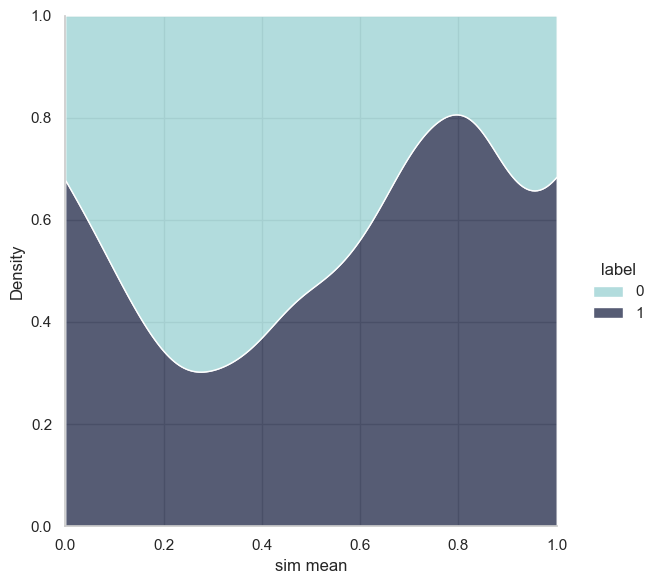

In [298]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.displot(
    data=df,
    x="sim mean", hue="label",
    kind="kde", height=6,
    multiple="fill", clip=(0, 1),
    palette="ch:rot=-.25,hue=1,light=.75",
)

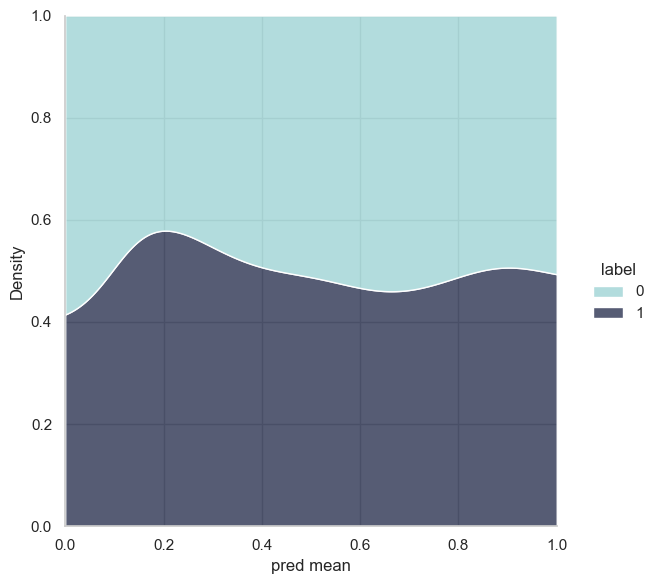

In [299]:
sns.displot(
    data=df,
    x="pred mean", hue="label",
    kind="kde", height=6,
    multiple="fill", clip=(0, 1),
    palette="ch:rot=-.25,hue=1,light=.75",
)

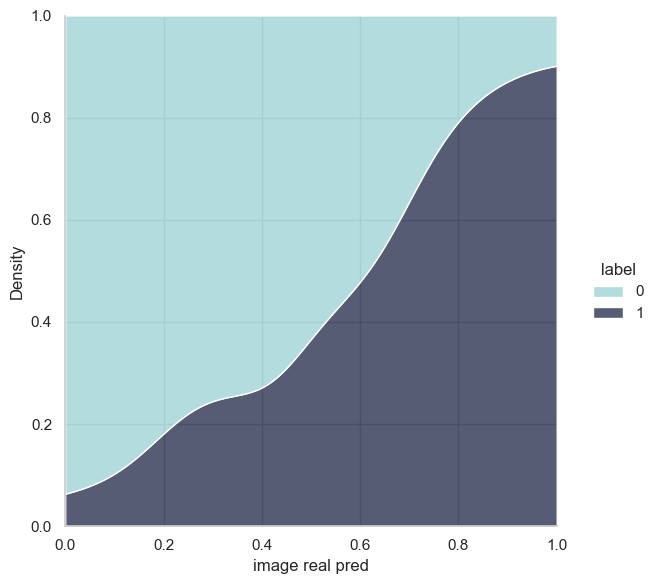

In [300]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.displot(
    data=df,
    x="image real pred", hue="label",
    kind="kde", height=6,
    multiple="fill", clip=(0, 1),
    palette="ch:rot=-.25,hue=1,light=.75",
)

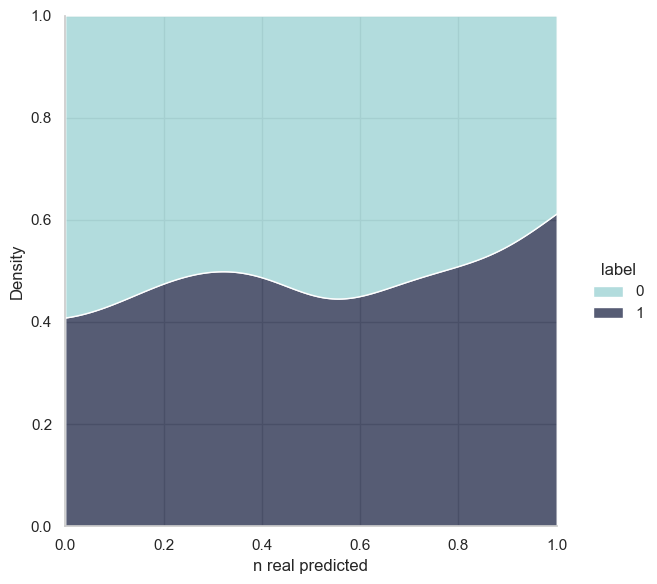

In [301]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.displot(
    data=df,
    x="n real predicted", hue="label",
    kind="kde", height=6,
    multiple="fill", clip=(0, 1),
    palette="ch:rot=-.25,hue=1,light=.75",
)

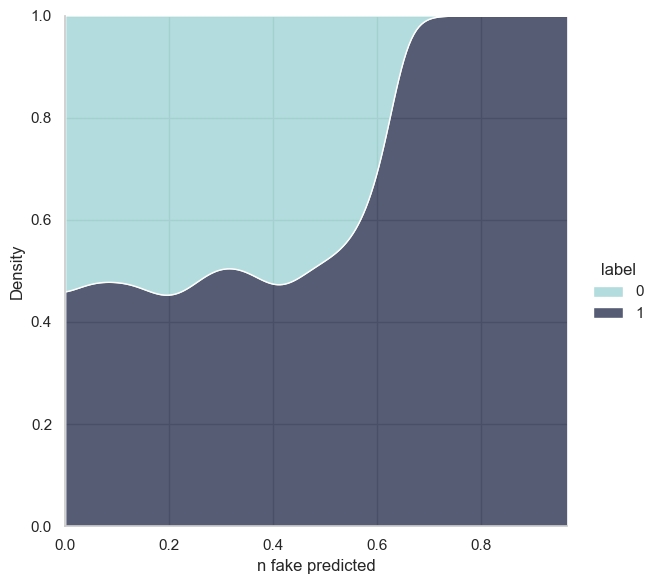

In [302]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.displot(
    data=df,
    x="n fake predicted", hue="label",
    kind="kde", height=6,
    multiple="fill", clip=(0, 1),
    palette="ch:rot=-.25,hue=1,light=.75",
)

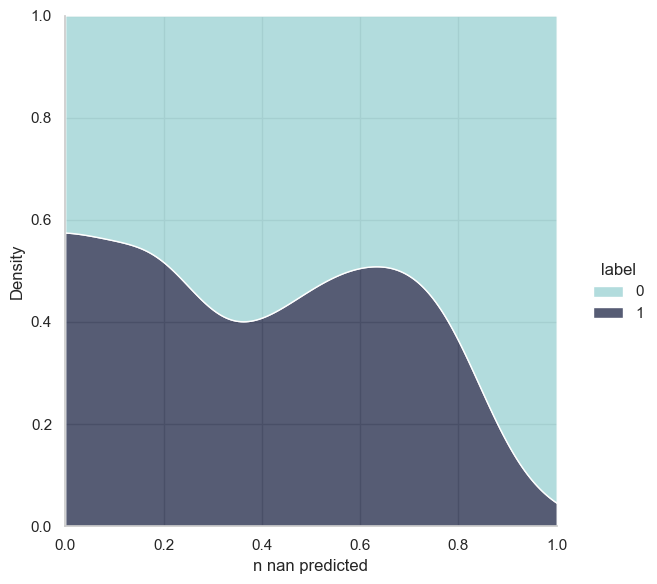

In [303]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.displot(
    data=df,
    x="n nan predicted", hue="label",
    kind="kde", height=6,
    multiple="fill", clip=(0, 1),
    palette="ch:rot=-.25,hue=1,light=.75",
)

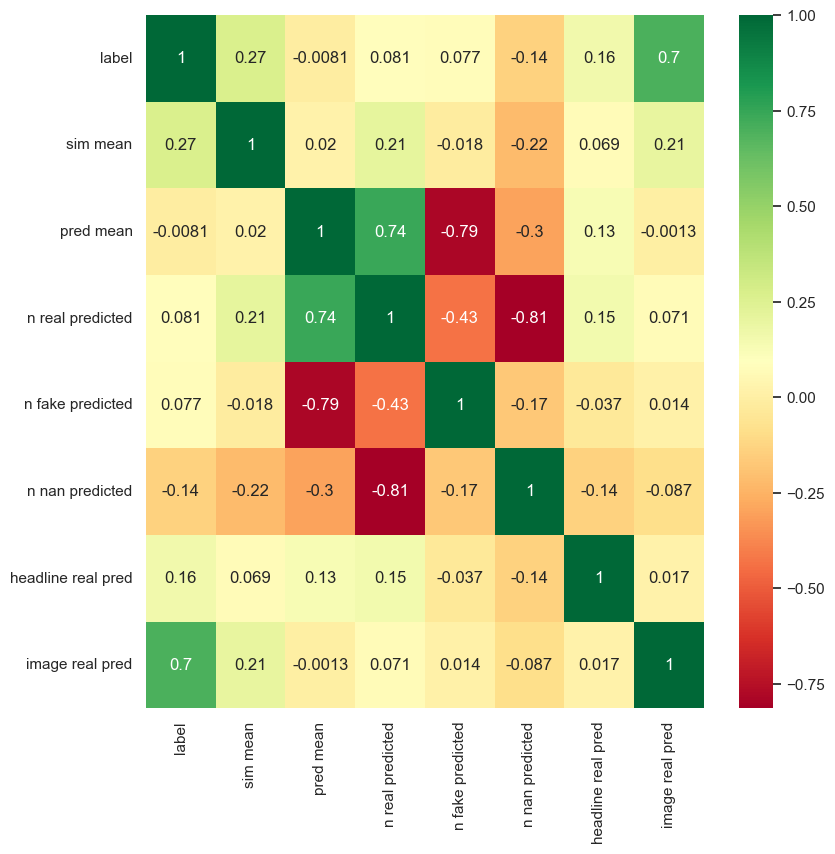

In [304]:
import matplotlib.pyplot as plt
corrmat = df[['label', 
       'sim mean', 'pred mean', 'n real predicted', 'n fake predicted',
       'n nan predicted', 'headline real pred', 'image real pred']].corr()
top_corr_features = corrmat.index
plt.figure(figsize = (9,9))
g = sns.heatmap(df[top_corr_features].corr(), annot=True , cmap = 'RdYlGn')

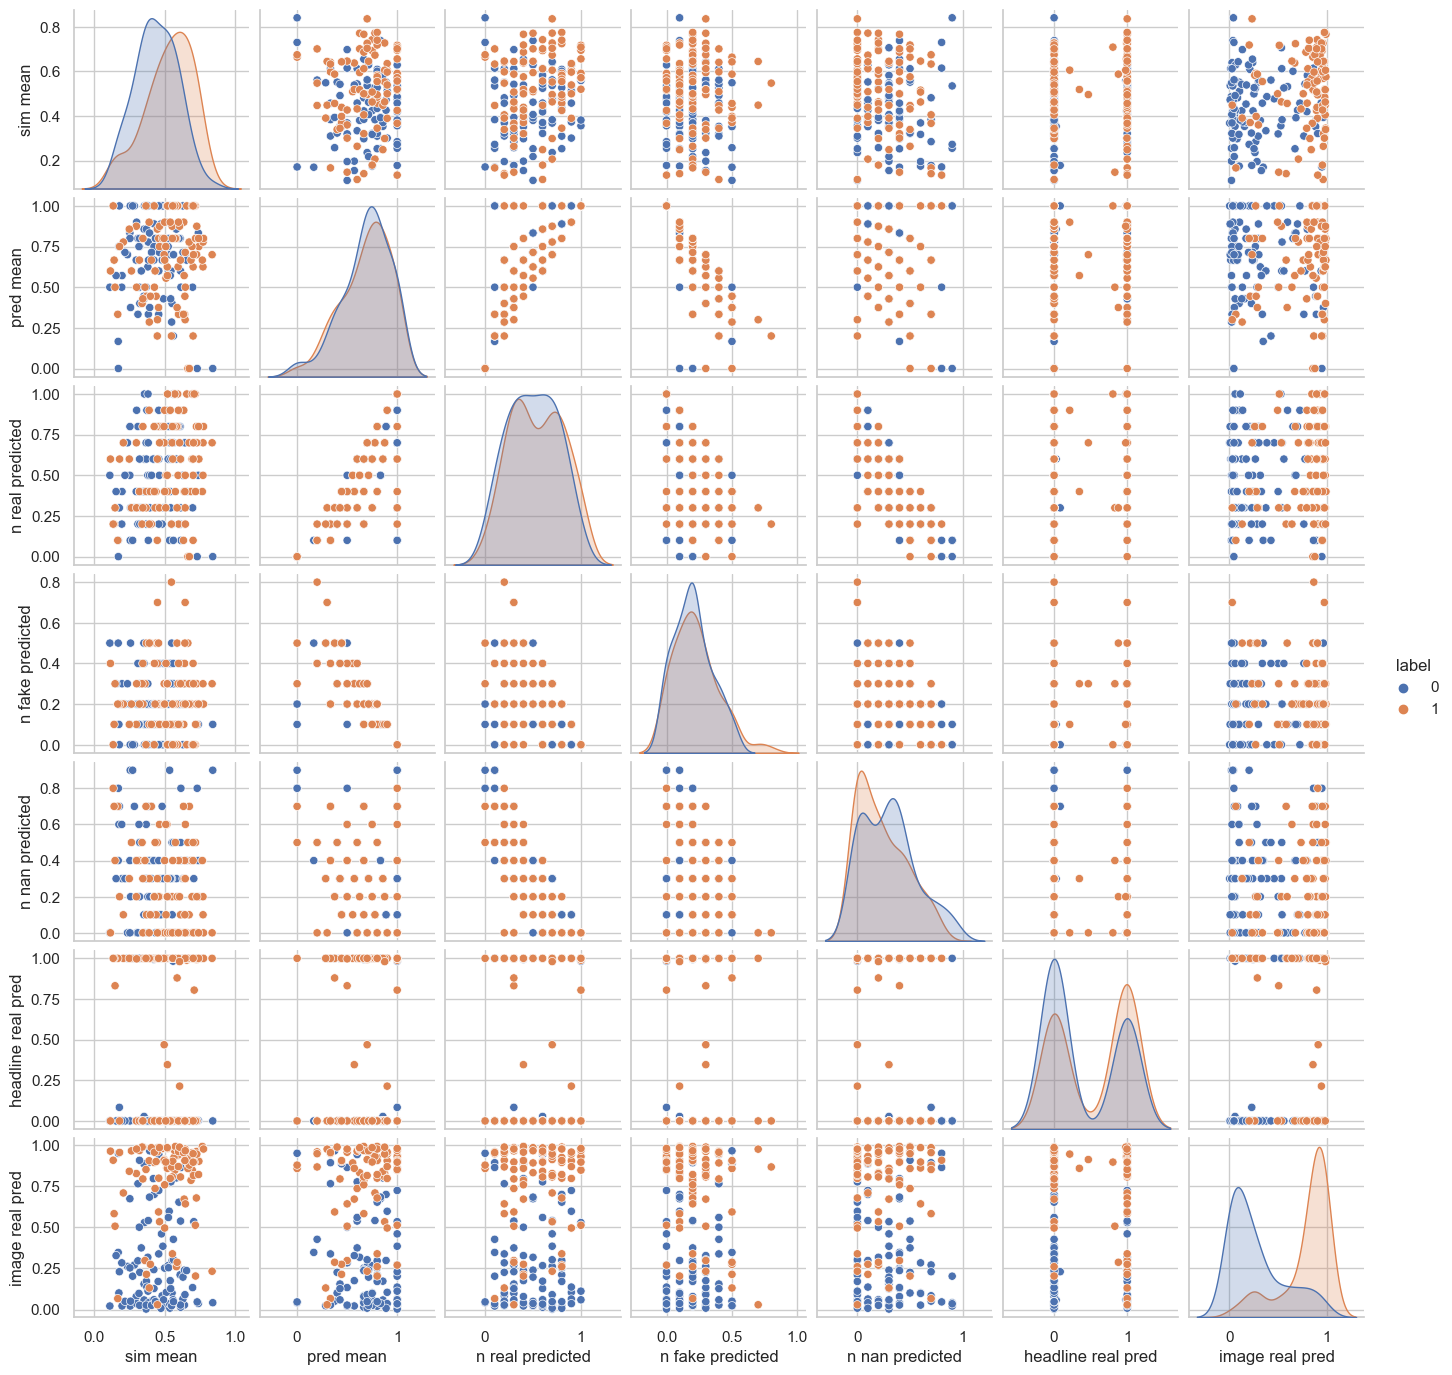

In [305]:
df_pairplot = df[['label', 
       'sim mean', 'pred mean', 'n real predicted', 'n fake predicted',
       'n nan predicted', 'headline real pred', 'image real pred']]
sns.pairplot(df_pairplot, hue='label', height=2, )

In [306]:
from collections import defaultdict

In [327]:
X = np.array(df[['sim mean', 'pred mean', 'n real predicted', 'n fake predicted',
       'n nan predicted', 'headline real pred', 'image real pred']], dtype='float32')
y = np.array(df['label'])
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
import joblib



#SVM
clfSVM = Pipeline(steps = [('StandardScaler', StandardScaler()),('SVM', SVC(probability=True))])
#logistic regression
clfLOGREG = Pipeline(steps = [('StandardScaler', StandardScaler()),('Logistic Regression', LogisticRegression())])
#XGBoost
clfXGB = Pipeline(steps = [('StandardScaler', StandardScaler()),('XGBoost', XGBClassifier())])
#Naive Bayes
clfNB = Pipeline(steps = [('StandardScaler', StandardScaler()),('Naive Bayes', GaussianNB())])
#Random forest
clfRFC = Pipeline(steps = [('StandardScaler', StandardScaler()),('RFC', RandomForestClassifier())])

models = [clfSVM, clfLOGREG, clfXGB, clfNB, clfRFC]
trained_models =[]

rand_state_dict = defaultdict(list)

for i in range(100):
    #model_scores={}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
    model_group=[]
    for idx, model in enumerate(models):
        model.fit(X_train, y_train)
        name = list(model.named_steps)[1]
        
        accuracy = model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        metrics = {'accuracy':accuracy, 'mae':mae, 'mse':mse, 'f1':f1}  

        for metric in metrics.keys():
            rand_state_dict[metric].append(metrics[metric])
        rand_state_dict['name'].append(name)
        rand_state_dict['rand_state'].append(i)
        
        model_group.append(model)
    
    trained_models.append(model_group)
        
    
        


        

    # joblib.dump(model, f'{name}-General-Classifier3.joblib')
    # print(f'model {idx+1} done')




In [328]:
model_score_df = pd.DataFrame(rand_state_dict)
model_score_df

,accuracy,mae,mse,f1,name,rand_state
0,0.745763,0.254237,0.254237,0.745763,SVM,0
1,0.796610,0.203390,0.203390,0.800000,Logistic Regression,0
2,0.745763,0.254237,0.254237,0.754098,XGBoost,0
3,0.779661,0.220339,0.220339,0.779661,Naive Bayes,0
4,0.796610,0.203390,0.203390,0.800000,RFC,0
...,...,...,...,...,...,...
495,0.830508,0.169492,0.169492,0.827586,SVM,99
496,0.847458,0.152542,0.152542,0.847458,Logistic Regression,99
497,0.779661,0.220339,0.220339,0.771930,XGBoost,99
498,0.847458,0.152542,0.152542,0.847458,Naive Bayes,99


In [329]:
model_score_df[model_score_df['accuracy']==model_score_df['accuracy'].max()]


,accuracy,mae,mse,f1,name,rand_state
75,0.915254,0.084746,0.084746,0.915254,SVM,15
250,0.915254,0.084746,0.084746,0.915254,SVM,50
415,0.915254,0.084746,0.084746,0.915254,SVM,83


In [330]:
model_score_df[model_score_df['f1']==model_score_df['f1'].max()]

,accuracy,mae,mse,f1,name,rand_state
75,0.915254,0.084746,0.084746,0.915254,SVM,15
250,0.915254,0.084746,0.084746,0.915254,SVM,50
415,0.915254,0.084746,0.084746,0.915254,SVM,83


In [331]:
model_score_df.sort_values('accuracy', ascending=False)

,accuracy,mae,mse,f1,name,rand_state
250,0.915254,0.084746,0.084746,0.915254,SVM,50
415,0.915254,0.084746,0.084746,0.915254,SVM,83
75,0.915254,0.084746,0.084746,0.915254,SVM,15
201,0.898305,0.101695,0.101695,0.896552,Logistic Regression,40
316,0.898305,0.101695,0.101695,0.888889,Logistic Regression,63
...,...,...,...,...,...,...
284,0.711864,0.288136,0.288136,0.738462,RFC,56
67,0.694915,0.305085,0.305085,0.666667,XGBoost,13
281,0.694915,0.305085,0.305085,0.709677,Logistic Regression,56
147,0.694915,0.305085,0.305085,0.689655,XGBoost,29


In [332]:
for model in models:
    name = list(model.named_steps)[1]
    print(name, "accuracy mean :",model_score_df[model_score_df['name']==name]['accuracy'].mean())
    print(name, "accuracy median :",model_score_df[model_score_df['name']==name]['accuracy'].median())
    print(name, "accuracy mode :",model_score_df[model_score_df['name']==name]['accuracy'].mode())

SVM accuracy mean : 0.8227118644067797
SVM accuracy median : 0.8135593220338984
SVM accuracy mode : 0    0.813559
Name: accuracy, dtype: float64
Logistic Regression accuracy mean : 0.8279661016949152
Logistic Regression accuracy median : 0.8305084745762712
Logistic Regression accuracy mode : 0    0.830508
1    0.847458
Name: accuracy, dtype: float64
XGBoost accuracy mean : 0.7883050847457627
XGBoost accuracy median : 0.7966101694915254
XGBoost accuracy mode : 0    0.79661
Name: accuracy, dtype: float64
Naive Bayes accuracy mean : 0.8177966101694915
Naive Bayes accuracy median : 0.8135593220338984
Naive Bayes accuracy mode : 0    0.813559
Name: accuracy, dtype: float64
RFC accuracy mean : 0.8066101694915254
RFC accuracy median : 0.8135593220338984
RFC accuracy mode : 0    0.830508
Name: accuracy, dtype: float64


<Axes: xlabel='rand_state', ylabel='accuracy'>

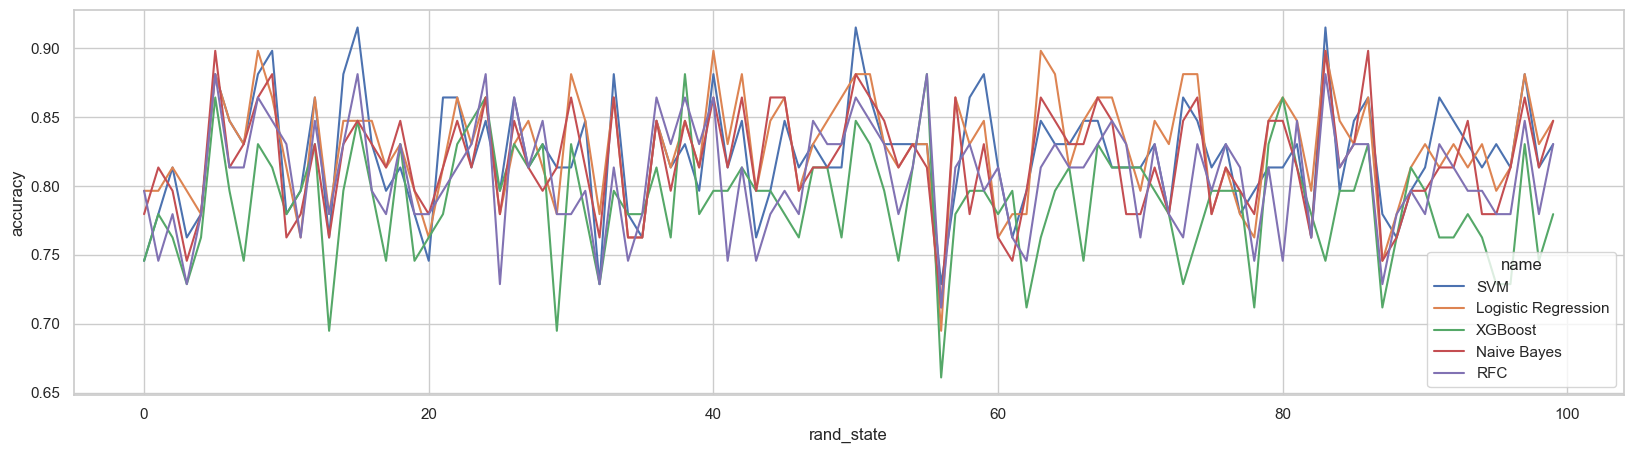

In [333]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(ax=ax, x="rand_state", y="accuracy",
             hue="name",
             data=model_score_df)

In [336]:
print(trained_models[15][3].predict(X_test))
print(trained_models[15][3].predict_proba(X_test))

[1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0]
[[3.34929672e-02 9.66507033e-01]
 [4.28435078e-02 9.57156492e-01]
 [1.93197456e-02 9.80680254e-01]
 [9.76053164e-01 2.39468361e-02]
 [2.51487484e-01 7.48512516e-01]
 [7.93079226e-03 9.92069208e-01]
 [9.43108208e-01 5.68917921e-02]
 [9.57446020e-01 4.25539802e-02]
 [2.16369947e-01 7.83630053e-01]
 [9.90813539e-01 9.18646113e-03]
 [7.34846352e-02 9.26515365e-01]
 [9.59024605e-01 4.09753953e-02]
 [2.20250848e-02 9.77974915e-01]
 [9.95552926e-01 4.44707433e-03]
 [1.92865455e-01 8.07134545e-01]
 [9.77343659e-01 2.26563407e-02]
 [6.43544978e-01 3.56455022e-01]
 [9.38307888e-01 6.16921120e-02]
 [8.60676977e-01 1.39323023e-01]
 [2.51289951e-01 7.48710049e-01]
 [9.91450524e-01 8.54947635e-03]
 [9.47711413e-01 5.22885875e-02]
 [7.34559303e-01 2.65440697e-01]
 [4.47062980e-01 5.52937020e-01]
 [9.25534537e-01 7.44654633e-02]
 [3.59452990e-02 9.64054701e-01]
 [5.83964281e-01 4.16

In [361]:
res = trained_models[15][0].predict_proba(X_test)[:,1]

In [362]:
res


array([0.93529657, 0.80085241, 0.90447576, 0.06826225, 0.55285578,
       0.94869626, 0.02270558, 0.06653805, 0.74757923, 0.01237242,
       0.95196825, 0.03902134, 0.88008082, 0.26539235, 0.88361284,
       0.01813479, 0.18367692, 0.13024737, 0.2200828 , 0.81739369,
       0.01009594, 0.19368856, 0.0862932 , 0.88678497, 0.05374888,
       0.91293134, 0.19438639, 0.76646745, 0.04662895, 0.91703966,
       0.42026171, 0.09847954, 0.7730207 , 0.09196154, 0.01627055,
       0.28470757, 0.95101459, 0.37323672, 0.61924785, 0.09692719,
       0.88358029, 0.01199267, 0.09131185, 0.91554823, 0.81727407,
       0.11770254, 0.84343521, 0.95510966, 0.13426039, 0.96576673,
       0.00591091, 0.89207711, 0.92527587, 0.86256229, 0.94563237,
       0.87722071, 0.00636063, 0.95216173, 0.24596823])

In [353]:
res

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [371]:
model1 = joblib.load('classifiers/SVM-General-Classifier91ACC.joblib')

In [374]:
X_test[0]

array([0.70168525, 1.        , 0.6       , 0.        , 0.4       ,
       0.9999995 , 0.8971459 ], dtype=float32)

In [378]:
model1.predict_proba([X_test[0]])[0][1]

0.9352965705145652

In [367]:
joblib.dump(trained_models[15][0], f'SVM-General-Classifier91ACC.joblib') 

['SVM-General-Classifier91ACC.joblib']

In [370]:
print(trained_models[15][0])

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('SVM', SVC(probability=True))])


In [355]:
np.array_equal(trained_models[15][3].predict(X_test), res)

True

In [368]:
!pip install Flask

     ---------------------------------------- 96.9/96.9 kB 1.1 MB/s eta 0:00:00
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)


In [369]:
%pip install Flask

Note: you may need to restart the kernel to use updated packages.
